In [1]:
### Setting env
import os, sys

folder = os.getcwd()
if(not(folder.endswith('tcc-machine-learning'))):
        os.chdir('..')
folder = os.getcwd()

### Core Packages
import pandas as pd
import numpy as np

### Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import plotly.graph_objects as go

### Financial Packages
import yfinance as yf
import pandas_datareader as pdr

### Thecnical Analysis Packages
import ta
import pandas_ta as pdta
import talib

### Functions
from dags import config
from dags.utils import chose_path_to_work, collect_raw_data, plot_boxplots, save_image, formating_raw_columns

### Others
import warnings

##### Config

In [16]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 12], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

In [17]:
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

#### Collecting Data

In [2]:
ticker_collect = 'PETR4.SA'
collect_raw_data(ticker_collect)

[*********************100%***********************]  1 of 1 completed


#### Loading Data

In [3]:
ticker = 'petr4.sa'
df_ticker = pd.read_csv(f'data/raw/{ticker}.csv', encoding='utf8', delimiter=',')

,date,open,high,low,close,adj_close,volume
0,2000-01-03,5.875,5.875000,5.875000,5.875000,2.928084,35389440000
1,2000-01-04,5.550,5.550000,5.550000,5.550000,2.766104,28861440000
2,2000-01-05,5.494,5.494000,5.494000,5.494000,2.738194,43033600000
3,2000-01-06,5.475,5.475000,5.475000,5.475000,2.728724,34055680000
4,2000-01-07,5.500,5.500000,5.500000,5.500000,2.741184,20912640000
...,...,...,...,...,...,...,...
5619,2022-05-16,34.250,34.880001,34.009998,34.610001,34.610001,92075300
5620,2022-05-17,35.000,35.139999,34.139999,34.160000,34.160000,90914700
5621,2022-05-18,34.180,34.560001,33.430000,33.599998,33.599998,80986200
5622,2022-05-19,33.520,34.290001,33.330002,34.169998,34.169998,63983100


In [ ]:
fig = go.Figure(data = go.Ohlc(
    x = df_ticker.date,
    open = df_ticker.open,
    high = df_ticker.high,
    low = df_ticker.low,
    close = df_ticker.close
))
fig.show()

### Describing Data

In [20]:
df_ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       5624 non-null   datetime64[ns]
 1   open       5624 non-null   float64       
 2   high       5624 non-null   float64       
 3   low        5624 non-null   float64       
 4   close      5624 non-null   float64       
 5   adj_close  5624 non-null   float64       
 6   volume     5624 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.7 KB


In [21]:
print(f"{ticker}:\n{df_ticker.shape[0]} rows\n{df_ticker.shape[1]} columns")

petr4.sa:
5624 rows
7 columns


In [22]:
list_columns = (df_ticker.columns).tolist()
print(f'Columns: {list_columns}')

Columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']


**NOTES**

**Legenda das Colunas:**
- Date: Data do registro
- Open: Preço de abertura do dia
- High: Preço máximo atingido no dia
- Low:  Preço mínimo atingido no dia
- Close: Preço de fechamento do dia
- Adj Close: Preço de fechamento ajustado
- Volume: Volume de ações negociadas

###  Exploring Data

In [23]:
### Ticker Measures
df_ticker.describe()

,open,high,low,close,adj_close,volume
count,5624.00,5624.00,5624.00,5624.00,5624.00,5624.00
mean,18.72,19.00,18.43,18.70,11.77,572355066.18
std,9.54,9.69,9.37,9.51,6.60,3986036361.09
min,4.20,4.27,4.12,4.20,2.18,0.00
25%,9.96,10.14,9.72,9.98,5.78,20962175.00
50%,18.91,19.20,18.55,18.85,11.71,33263700.00
75%,25.65,26.03,25.29,25.60,16.25,53654000.00
max,67.50,67.50,51.95,52.51,34.83,73564160000.00


In [24]:
### Checking for missing data
df_ticker.isna().any()

date         False
open         False
high         False
low          False
close        False
adj_close    False
volume       False
dtype: bool

In [25]:
### Checking for duplicated data
df_ticker.duplicated().any()

False

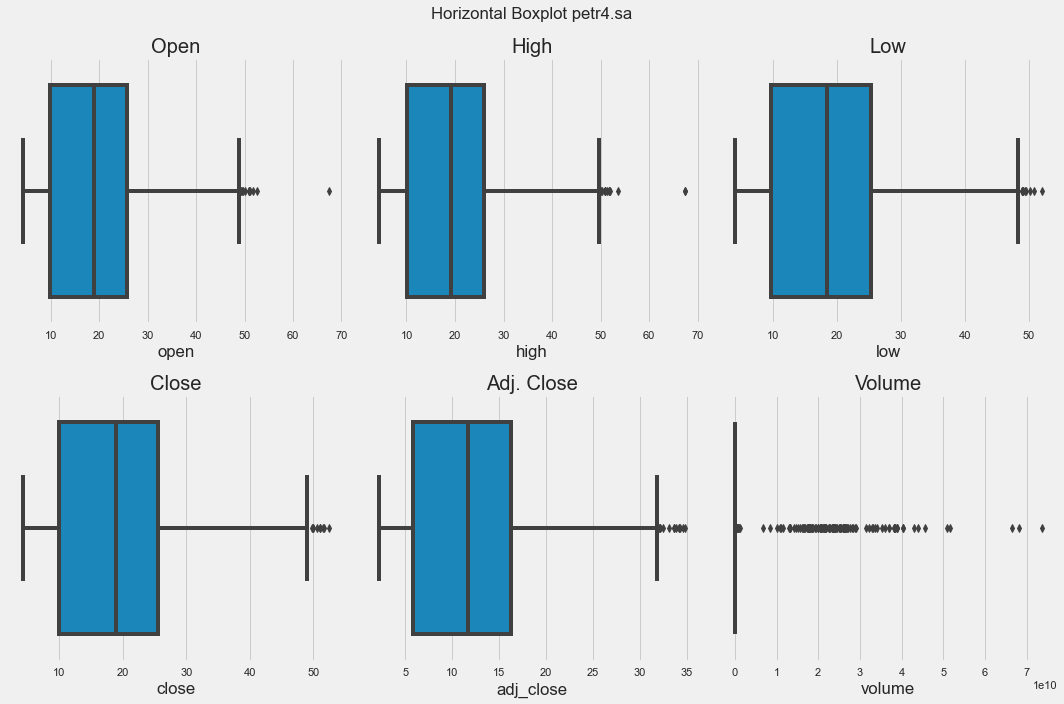

In [26]:
boxplots = plot_boxplots(df_ticker, ticker)

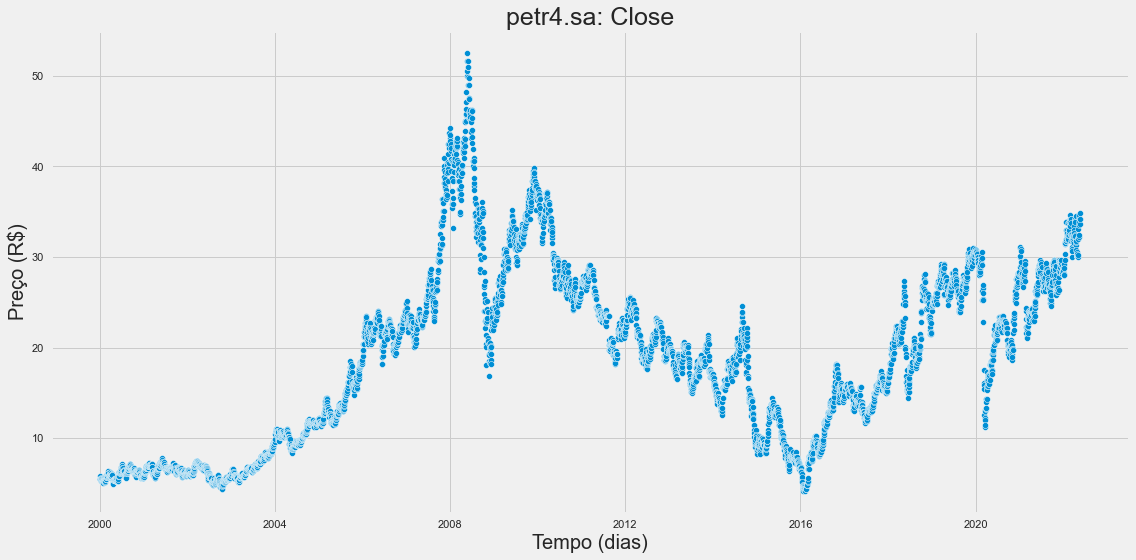

In [47]:
img_ticker_distr_close = sns.scatterplot(data = df_ticker, x = 'date', y = 'close')
plt.title(f'{ticker}: Close', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

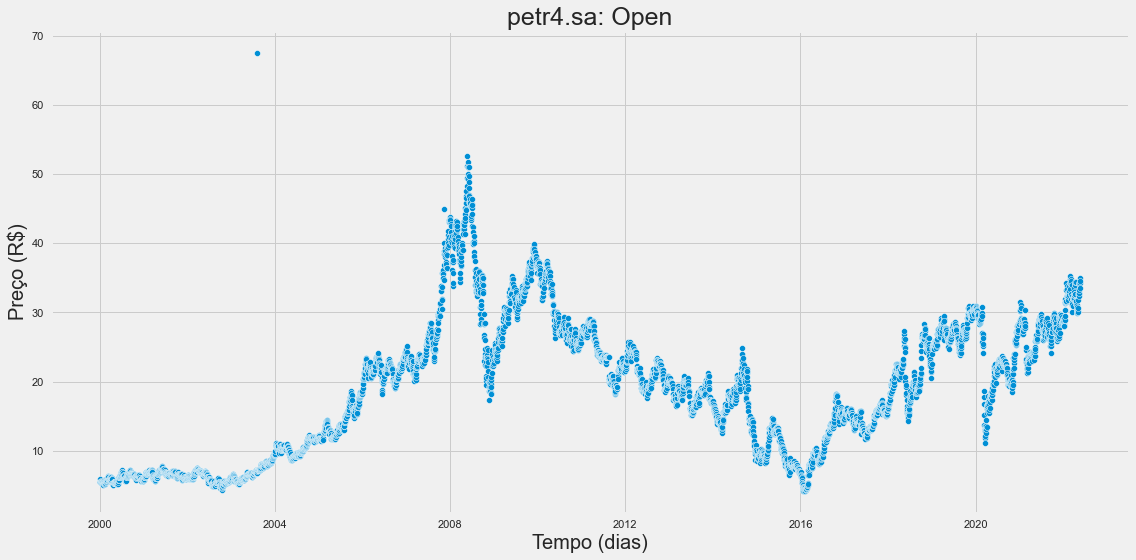

In [48]:
img_ticker_distr_open = sns.scatterplot(data = df_ticker, x = 'date', y = 'open')
plt.title(f'{ticker}: Open', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

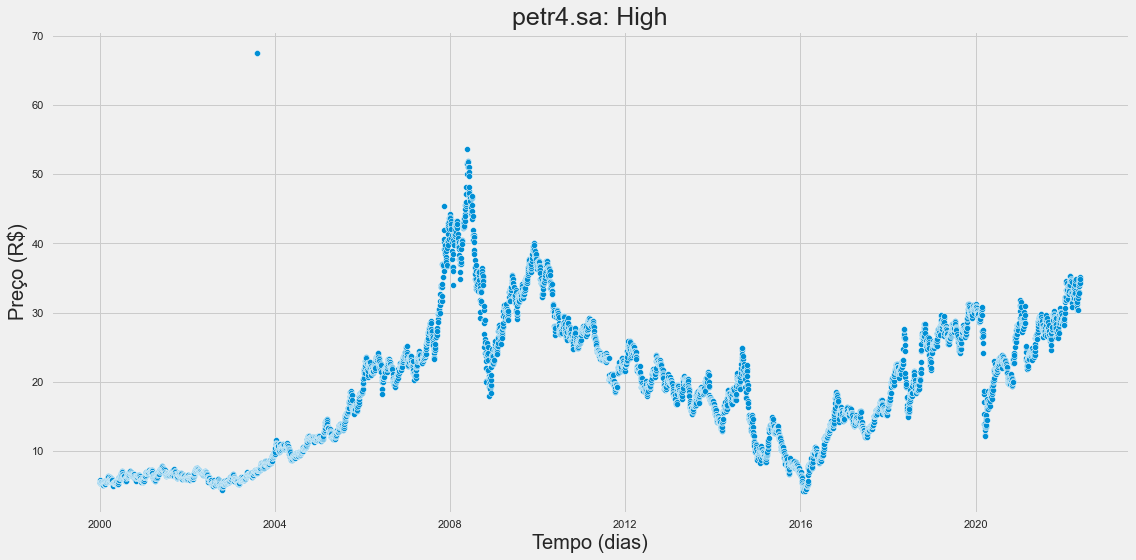

In [49]:
img_ticker_distr_high = sns.scatterplot(data = df_ticker, x = 'date', y = 'high')
plt.title(f'{ticker}: High', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

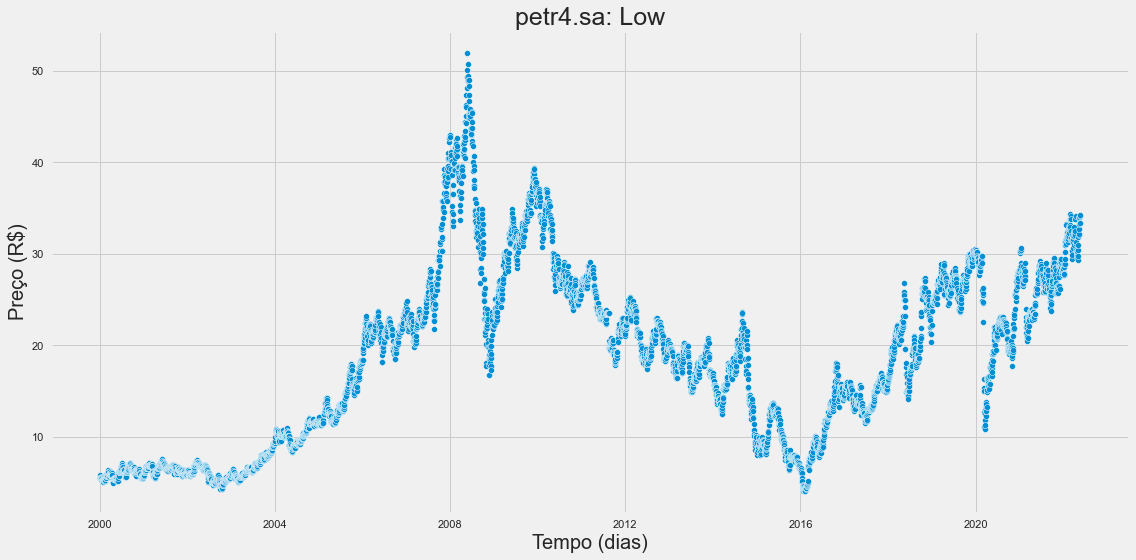

In [53]:
img_ticker_distr_low = sns.scatterplot(data = df_ticker, x = 'date', y = 'low')
plt.title(f'{ticker}: Low', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Preço (R$)", fontsize=20)
plt.grid(True)

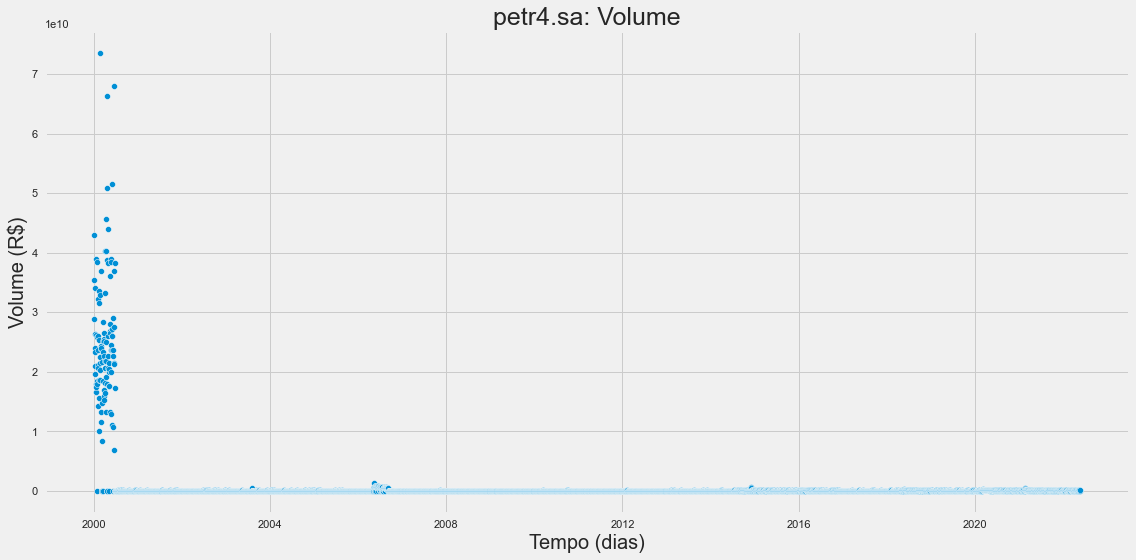

In [56]:
img_ticker_distr_volume = sns.scatterplot(data = df_ticker, x = 'date', y = 'volume')
plt.title(f'{ticker}: Volume', fontsize=25)
plt.xlabel("Tempo (dias)", fontsize=20)
plt.ylabel("Volume (R$)", fontsize=20)
plt.grid(True)

### Saving Images

In [57]:
save_image(img=boxplots, name=f'img_{ticker}_boxplots')
save_image(img=img_ticker_distr_close, name=f'img_{ticker}_close')
save_image(img=img_ticker_distr_open, name=f'img_{ticker}_open')
save_image(img=img_ticker_distr_high, name=f'img_{ticker}_high')
save_image(img=img_ticker_distr_low, name=f'img_{ticker}_low')
save_image(img=img_ticker_distr_volume, name=f'img_{ticker}_volume')

Image img_petr4.sa_boxplots saved.
Image img_petr4.sa_close saved.
Image img_petr4.sa_open saved.
Image img_petr4.sa_high saved.
Image img_petr4.sa_low saved.
Image img_petr4.sa_volume saved.
